<a href="https://colab.research.google.com/github/daniel-786/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digit Recognition

**Importing dependencies**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**Data Collection**

In [3]:
mnist_dataset = tf.keras.datasets.mnist

**Train Test Split**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(x_train[0])

numpy.ndarray

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

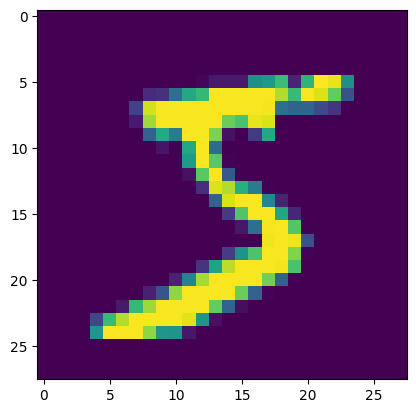

In [7]:
# display image
plt.imshow(x_train[0])
plt.show()

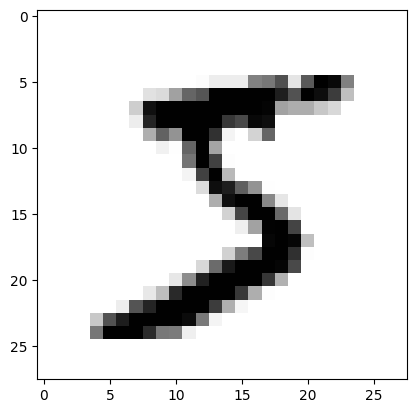

In [8]:
# binary image B & W
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

**Normalise**

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Build NN model**

In [11]:
# Sequential model
model = tf.keras.models.Sequential()

# adding layers to model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [12]:
# compile model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
# model training
history = model.fit(x_train, y_train, validation_split= 0.1, epochs = 5)

Epoch 1/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0343 - accuracy: 0.9880 - val_loss: 0.0759 - val_accuracy: 0.9798
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0831 - val_accuracy: 0.9787
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0729 - val_accuracy: 0.9815
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0191 - accuracy: 0.9932 - val_loss: 0.1018 - val_accuracy: 0.9775
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0935 - val_accuracy: 0.9800


**Visualise Training**

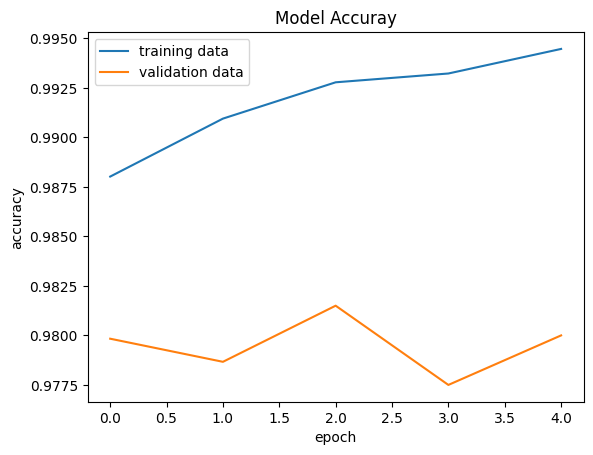

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuray")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"])

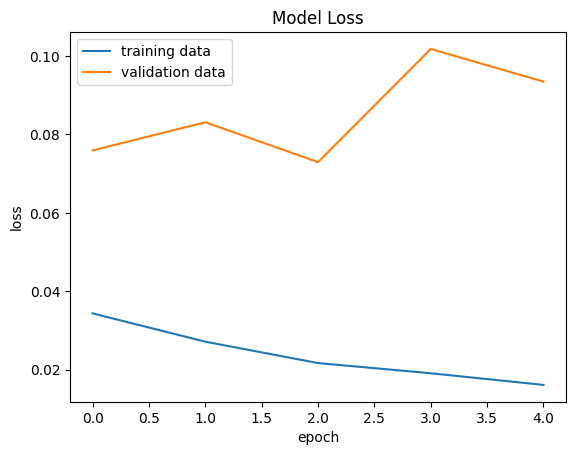

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"])

**Model Evaluation**

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9746


In [18]:
print("Accuracy: {:.2f}".format(val_acc))

Accuracy: 0.97


**Prediction**

In [19]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [20]:
print(predictions)

[[6.9339682e-14 7.4387070e-14 4.0008510e-11 ... 9.9999994e-01
  1.5484233e-14 2.0449681e-10]
 [2.0527482e-18 8.3211802e-09 9.9999994e-01 ... 3.9922289e-15
  4.1796275e-10 8.4352171e-23]
 [6.1993861e-11 9.9999493e-01 9.2072311e-10 ... 2.1475375e-06
  2.3826474e-06 1.0639270e-11]
 ...
 [2.3595732e-18 4.6898123e-12 5.3478557e-17 ... 2.1148674e-09
  2.0195857e-11 4.8214971e-10]
 [3.2271685e-12 3.1052651e-13 2.8644186e-12 ... 1.2032017e-10
  4.4427162e-07 1.6800515e-16]
 [2.4817992e-10 2.2432619e-13 1.1016531e-10 ... 1.7759796e-15
  1.4938987e-09 4.1601545e-15]]


In [21]:
print(np.argmax(predictions[4]))

4


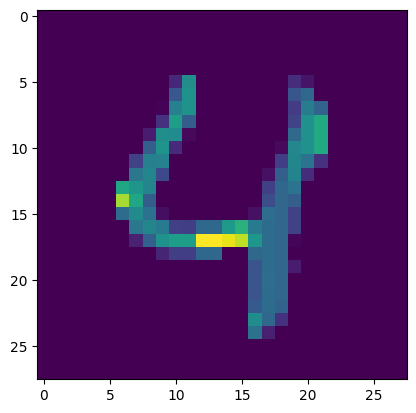

In [22]:
# check the actual image
plt.imshow(x_test[4])
plt.show()